In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from matplotlib.ticker import MultipleLocator

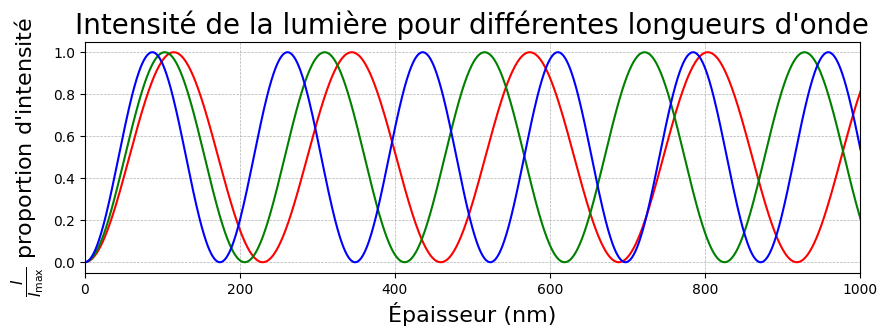

In [26]:
# Longueurs d'ondes

## Fonctions utilitaires
def gauss(x, mean, sigma):
    return np.exp(-0.5 * ((x - mean) / sigma) ** 2)

## Paramètres initiaux
lam = 500
dmax = 1500
d = np.arange(1, dmax + 1)  # épaisseur du film de 1 à dmax nanomètre
I = np.cos(np.pi * (2 * 1.33 * d / lam - 0.5)) ** 2

## Calcul des intensités pour différentes longueurs d'onde
lam = 611
R0 = np.cos(np.pi * (2 * 1.33 * d / lam - 0.5)) ** 2

lam = 549
G0 = np.cos(np.pi * (2 * 1.33 * d / lam - 0.5)) ** 2

lam = 464
B0 = np.cos(np.pi * (2 * 1.33 * d / lam - 0.5)) ** 2

tx = np.ones(100)
ty = np.linspace(0, 1, 100)

## Affichage des courbes R0, G0, B0
plt.figure(figsize=(10, 3))
plt.plot(d, R0, 'r', label="Rouge")
plt.plot(d, G0, 'g', label="Vert")
plt.plot(d, B0, 'b', label="Bleu")
plt.title("Intensité de la lumière pour différentes longueurs d'onde", fontsize=20)
plt.xlabel("Épaisseur (nm)", fontsize=16)
plt.ylabel(r"$\frac{I}{I_\text{max}}$ proportion d'intensité", fontsize=16)
plt.xlim(0, 1000)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
#plt.gca().xaxis.set_major_locator(MultipleLocator(50))
#plt.legend(fontsize=12)
plt.savefig('fig_lgr2')
plt.show()


In [12]:
# Mesures cadre

## longueur
L_min = 28.2
L_max = 29.1

## longueur grande
Lg_min = 34.3
Lg_max = 35.2

## largeur 
l_min = 18.9
l_max = 19.8

## hauteur
h_min = 34
h_max = 35

## diamètre de la tige
d_min = 0.375
d_max = 0.390


L = (L_max + L_min)/2
uL = (L_max - L_min)/np.sqrt(12)

Lg = (Lg_max + Lg_min)/2
uLg = (Lg_max - Lg_min)/np.sqrt(12)

l = (l_max + l_min)/2
ul = (l_max - l_min)/np.sqrt(12)

h = (h_max + h_min)/2
uh = (h_max - h_min)/np.sqrt(12)

d = (d_max + d_min)/2
ud = (d_max - d_min)/np.sqrt(12)

alpha = np.arcsin(h/Lg)
ualpha = (h/Lg)*(1/np.sqrt(1+ (h/Lg)**2))*np.sqrt( (uLg/Lg)**2 + (uLg/Lg)**2 )

print('Longueur du cadre : (', L, '+:-', uL, ')')
print('Largeur du cadre : (', l, '+:-', ul, ')')
print('Inclinaison du cadre en radians: (', np.pi/2 - alpha, '+:-', ualpha, ')')
print('Inclinaison du cadre en degrés: (', 90 - np.degrees(alpha), '+:-', np.degrees(ualpha), ')')
print('Diamètre de la tige : (', d, '+:-', ud, ')')

Longueur du cadre : ( 28.65 +:- 0.25980762113533223 )
Largeur du cadre : ( 19.35 +:- 0.25980762113533223 )
Inclinaison du cadre en radians: ( 0.12002405912403469 +:- 0.007449438865970469 )
Inclinaison du cadre en degrés: ( 6.876872027835844 +:- 0.42682140676083 )
Diamètre de la tige : ( 0.3825 +:- 0.004330127018922198 )


In [3]:
## Viscosité

def heta(p_glycerol,p_savon):
    heta_eau=1/1000
    heta_savon=400/1000
    heta_glycerol=1.49
    heta_solution = (heta_savon ** p_savon) * (heta_glycerol ** p_glycerol) * heta_eau ** (1-p_savon-p_glycerol)
    return heta_solution

heta_savon = 0.4
heta_sol = 0.001 * 0.000001

#On neglige donc la viscosité de l'enumerate

heta_sur = 2*0.00000001
